In [1]:
using Random, LinearAlgebra, StatsPlots, Statistics, LaTeXStrings, LightGraphs, GraphPlot

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1273
┌ Info: Precompiling LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1273
┌ Info: Precompiling LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d]
└ @ Base loading.jl:1273
┌ Info: Precompiling GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231]
└ @ Base loading.jl:1273


In [2]:
# Función auxiliar para generar un grafo según el modelo de Erdos-Renyi
function gen_er(n, p)
    g = SimpleGraph(n);
    for i in 1:n
        for j in i+1:n
            if p > rand()
                add_edge!(g, i, j);
            end
        end
    end
    return g
end

gen_er (generic function with 1 method)

In [9]:
# Tamaños de grafos
sizes = [1e2, 1e3, 1e4]

# Valores de c
cs = -4:0.5:4

# Guardar los resultados
R = Array{Float64}(undef, size(sizes)[1], size(cs)[1])


for (k, sz) in enumerate(sizes)
    # Parámetros del grafo
    n = Int(sz)
    pci = log(n) / n
    probs = pci .+ cs/n
    for (j, p) in enumerate(probs)
        count = 0
        for i in 1:100
            # Generar grafos y verificar si está conectado
            G = gen_er(n, p)
            count += is_connected(G)
        R[k, j] = count / 100
        end
    end
end

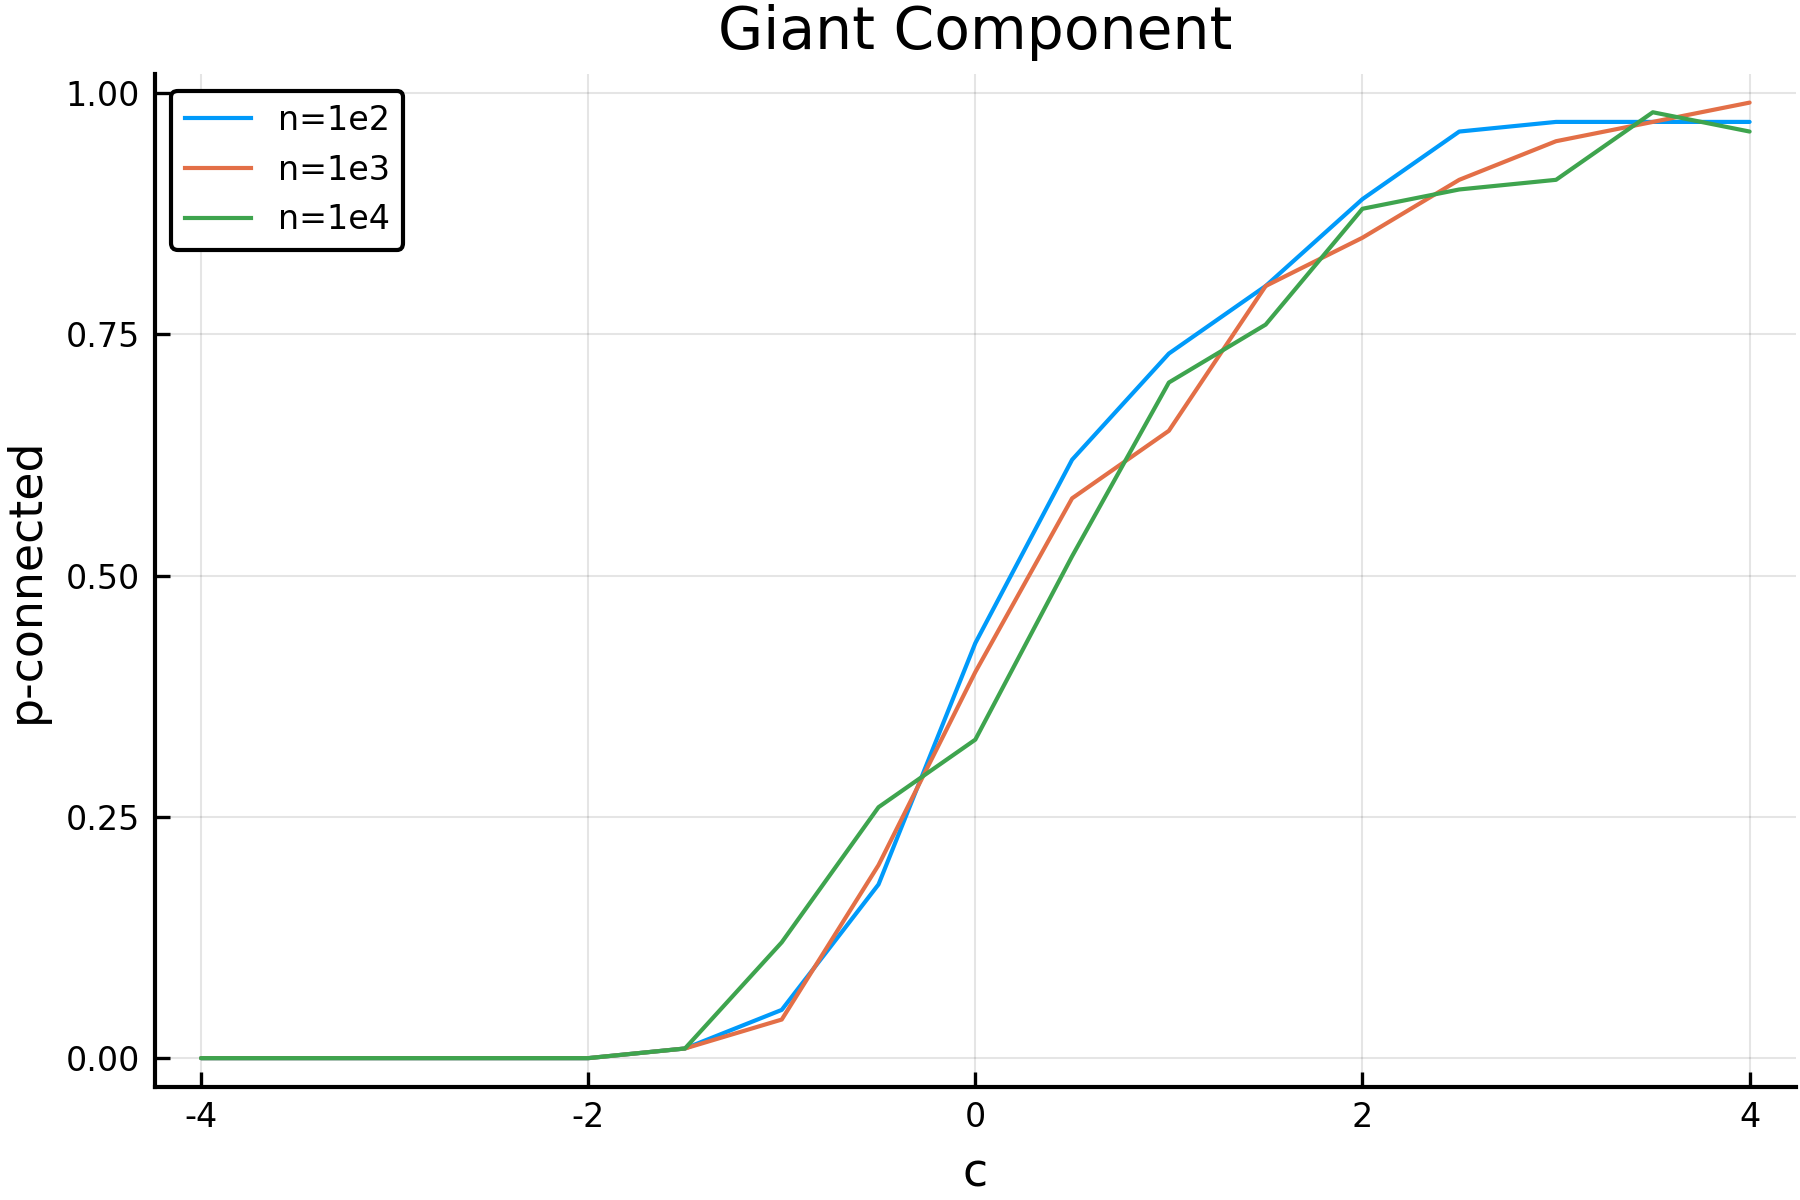

In [10]:
pyplot(dpi=300)
plot(cs, permutedims(R),
    title = "Giant Component",
    xlabel="c",
    ylabel="p-connected",
    label = ["n=1e2" "n=1e3" "n=1e4"])